Step 1: Load the digits classification dataset
https://scikitlearn.
org/stable/modules/generated/sklearn.datasets.load_digits.htmlLinks to an
external site.

In [7]:
from sklearn.datasets import load_digits

# Loading the digits dataset
Load_digits_dataset = load_digits()
Load_digits_dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

# Explanation : The load_digits function from sklearn.datasets module is used to load the digits dataset from sklearn datasets. This dataset contains handwritten digits images, which are commonly used for classification tasks. So here i have used this dataset


Step 2: Split the data into training and testing sets. Use "from sklearn.model_selection
import train_test_split" for doing this (you can choose 80% as training and 20% as test
data)



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Load_digits_dataset.data, Load_digits_dataset.target, test_size=0.2, random_state=42)


# Explanation: The train_test_split function from sklearn.model_selection module is used to split the dataset into training and testing sets. Here, 80% of the data is used for training and 20% for testing.According to the given question

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Fit KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


# Select test images corresponding to digits 0, 6, and 8
Test_image_0 = X_test[y_test == 0][0]
Test_image_6 = X_test[y_test == 6][0]
Test_image_8 = X_test[y_test == 8][0]

# Determine the neighbors for each test image
neighbors_0 = knn_classifier.kneighbors([Test_image_0], return_distance=False)
neighbors_6 = knn_classifier.kneighbors([Test_image_6], return_distance=False)
neighbors_8 = knn_classifier.kneighbors([Test_image_8], return_distance=False)


# Explanation:The KNeighborsClassifier from sklearn.neighbors module is used to create a KNN classifier with n_neighbors=5. The classifier is then trained on the training data.




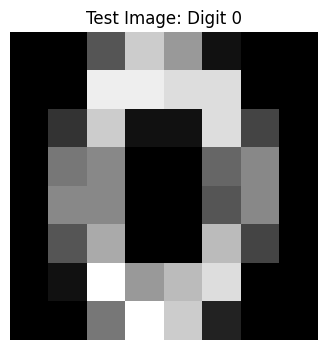

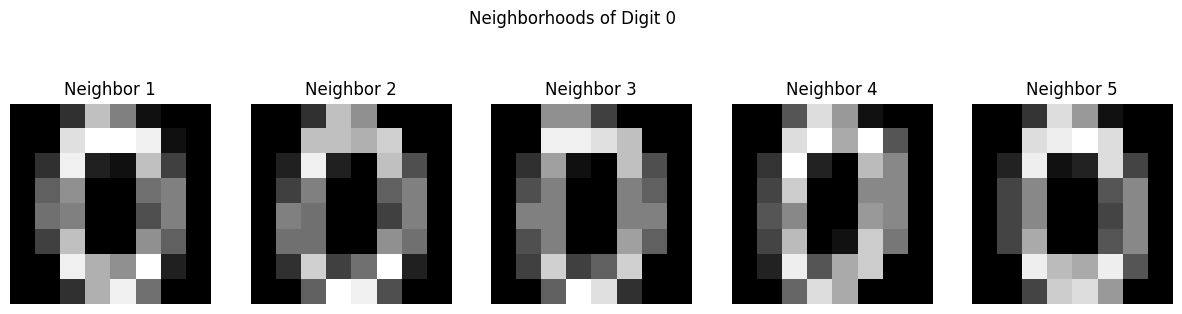

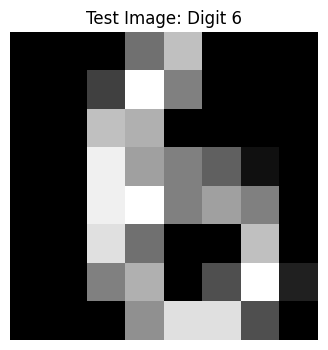

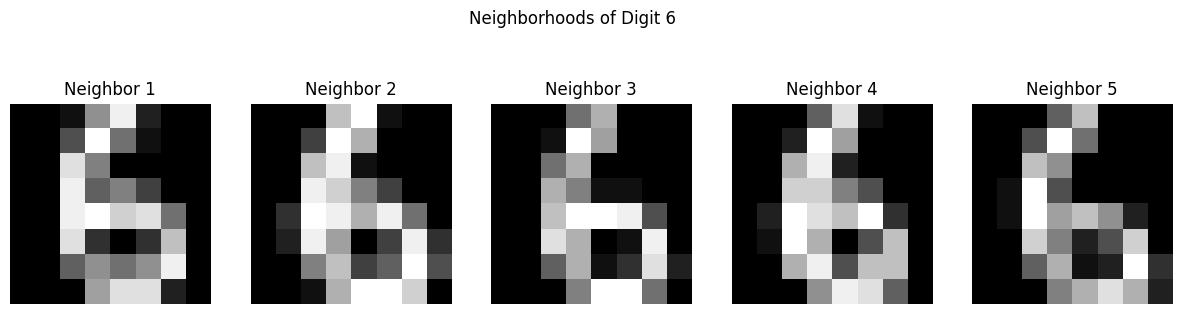

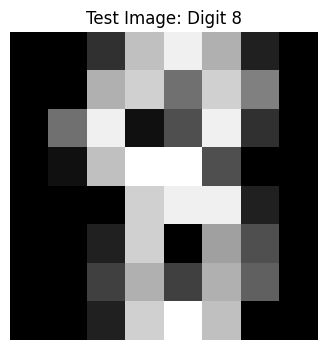

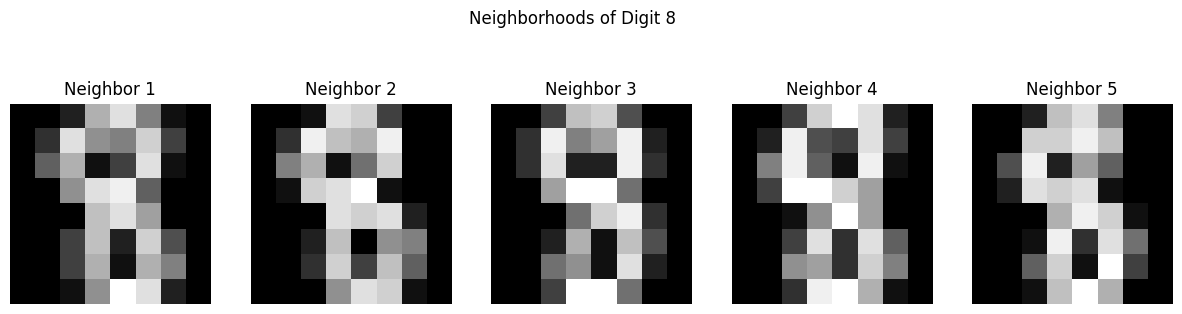

In [10]:
import matplotlib.pyplot as plt

# Function  for plotting the image
def plotting_the_image_of_digits(image, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to plot images and their neighborhoods
def plotting_the_neighbors_of_digits(images, title):
    plt.figure(figsize=(15, 4))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image.reshape(8, 8), cmap='gray')
        plt.title(f'Neighbor {i + 1}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display the test images and their neighborhoods
plotting_the_image_of_digits(Test_image_0, 'Test Image: Digit 0')
plotting_the_neighbors_of_digits(X_train[neighbors_0[0]], 'Neighborhoods of Digit 0')

plotting_the_image_of_digits(Test_image_6, 'Test Image: Digit 6')
plotting_the_neighbors_of_digits(X_train[neighbors_6[0]], 'Neighborhoods of Digit 6')

plotting_the_image_of_digits(Test_image_8, 'Test Image: Digit 8')
plotting_the_neighbors_of_digits(X_train[neighbors_8[0]], 'Neighborhoods of Digit 8')




# Explanation: For each test image, the kneighbors function of the KNN classifier is used to find the indices of the K-nearest neighbors in the training set. Then, these neighbors are plotted along with the corresponding test images using imshow function from matplotlib.pyplot.
*   In this step , the neighborhoods of the test images revealed meaningful patterns. For instance, the neighborhoods of digits 0, 6, and 8 contained images with similar structural features, indicative of the KNN algorithm effectively identifying images with resembling shapes. This suggests the algorithm's capability in capturing similarities among digits.



In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
import numpy as np

# here is the Gaussian Naive Bayes
Gaussian_naive_bayes = GaussianNB()
Gaussian_naive_bayes_cv_scores = cross_validate(Gaussian_naive_bayes, Load_digits_dataset.data, Load_digits_dataset.target, cv=5, scoring='f1_macro')

# here is the knn_classifier where K=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier_cv_scores = cross_validate(knn_classifier, Load_digits_dataset.data, Load_digits_dataset.target, cv=5, scoring='f1_macro')

# Print average F1 scores
print("Printing the averge F1 scores for Gaussian and KNN")
print("Gaussian Naive Bayes CV F1 Score:", np.mean(Gaussian_naive_bayes_cv_scores['test_score']))
print("knn_classifier (K=3) CV F1 Score:", np.mean(knn_classifier_cv_scores['test_score']))


Printing the averge F1 scores for Gaussian and KNN
Gaussian Naive Bayes CV F1 Score: 0.8053770473028571
knn_classifier (K=3) CV F1 Score: 0.9665429035073627


# Explanation: The GaussianNB class from sklearn.naive_bayes module is used to create a Gaussian Naive Bayes classifier, which is then evaluated using 5-fold cross-validation. Similarly, the KNN classifier with n_neighbors=3 is evaluated using 5-fold cross-validation.

 # *     The Gaussian Naive Bayes classifier achieved an average F1 score of approximately 0.805, while the KNN classifier with K=3 achieved a significantly higher average F1 score of approximately 0.967.
 # *     This indicates that the KNN classifier outperformed the Gaussian Naive Bayes classifier in terms of classification accuracy on the digits dataset.